In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/flipkart-best-selling-books/Best Selling Books- Buy Products Online at Best Price in India - All Categories _ Flipkart.com.csv


# **IMPORTING THE DATASET**

In [2]:
df = pd.read_csv('/kaggle/input/flipkart-best-selling-books/Best Selling Books- Buy Products Online at Best Price in India - All Categories _ Flipkart.com.csv')

# **Checking the dataset**

In [3]:
df.head(5)

,Item,type,selling_price,original_price,discount_perc,rating,Total_ratings,Delivery by,Delivery_time
0,"4 PCS Magic Practice Copybook For Kids, Englis...","Paperback, Generic",179,599.0,70.0,4.2,2450.0,Free delivery,Hot Deal
1,Math Concept King - All Formulas And Theorems ...,"Perfect Binding, Gagan Pratap Sir",189,200.0,5.0,4.4,26148.0,Free delivery,NaN
2,SSC Reasoning 7200 TCS MCQ Chapter Wise 4th Ed...,"Paperback, Pinnacle Publications",499,770.0,35.0,4.5,1816.0,Free delivery by,Today
3,SSC General Studies 6500 TCS MCQ Chapter Wise ...,"Paperback, Pinnacle Publications",499,650.0,23.0,4.6,1934.0,Free delivery by,Today
4,SSC Maths 6800 TCS MCQ Chapter Wise I 4th Edit...,"Paperback, Pinnacle Publications",499,770.0,35.0,4.5,2100.0,Free delivery by,Today


# **Getting general Info**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1195 entries, 0 to 1194
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Item            1195 non-null   object 
 1   type            1195 non-null   object 
 2   selling_price   1195 non-null   object 
 3   original_price  1107 non-null   float64
 4   discount_perc   1107 non-null   float64
 5   rating          1194 non-null   float64
 6   Total_ratings   1194 non-null   float64
 7   Delivery by     1180 non-null   object 
 8   Delivery_time   942 non-null    object 
dtypes: float64(4), object(5)
memory usage: 84.1+ KB


# **Getting the Necessary Values of the Columns**

In [5]:
df.describe()

,original_price,discount_perc,rating,Total_ratings
count,1107.000000,1107.000000,1194.000000,1194.000000
mean,767.317977,29.522132,4.405779,2194.666667
std,1396.214035,18.243486,0.157490,7061.285688
min,160.000000,2.000000,4.000000,4.000000
25%,315.000000,15.000000,4.300000,78.000000
50%,500.000000,28.000000,4.400000,531.000000
75%,760.000000,35.000000,4.500000,1679.000000
max,11999.000000,88.000000,4.800000,56305.000000


# **Checking for any null values**

In [6]:
df.isnull().sum()

Item                0
type                0
selling_price       0
original_price     88
discount_perc      88
rating              1
Total_ratings       1
Delivery by        15
Delivery_time     253
dtype: int64

# **Replacing the Missing Values with Mean**

In [7]:
columns_with_missing_values = ['original_price', 'discount_perc', 'rating', 'Total_ratings']
for col in columns_with_missing_values:
    mean_value = df[col].mean()
    df[col].fillna(round(mean_value,1), inplace=True)

# **All the Null Values has been replaced**

In [8]:
df.isnull().sum()

Item                0
type                0
selling_price       0
original_price      0
discount_perc       0
rating              0
Total_ratings       0
Delivery by        15
Delivery_time     253
dtype: int64

# **Dropping Delivery by and Delivery_time Columns**

In [9]:
df.drop(['Delivery by', 'Delivery_time'], axis=1, inplace=True)

# **Checking for any duplicate values**

In [10]:
df.duplicated().sum()

1110

Dropping the duplicate values

In [11]:
df.drop_duplicates(subset='Item', inplace=True)

# **Printing the columns**

In [12]:
df.columns

Index(['Item', 'type', 'selling_price', 'original_price', 'discount_perc',
       'rating', 'Total_ratings'],
      dtype='object')

# **Plotting the ratings**

In [13]:
df.rating.value_counts()

rating
4.4    23
4.5    19
4.6    12
4.3    11
4.2    10
4.0     4
4.7     2
4.8     1
Name: count, dtype: int64

# **Top 10 Highest Rated books**

In [14]:
df_sorted = df.sort_values(by='rating', ascending=False)
top_10_books = df_sorted.head(10)['Item']
print("Top 10 Highest-Rated Books:")
print("---------------------------")
for book_name in top_10_books:
    print(book_name)

Top 10 Highest-Rated Books:
---------------------------
The Indian Contract Act, 1872 EDITION - 2023
SURA`S 11th Standard Economics Exam Guide In English Me...
Delhi Police Constable Computer Knowledge Theory + MCQ ...
Set Of 2: Fundamentals Of Geography & Principles Of Ind...
B D CHAURASIA'S HUMAN ANATOMY 9th Ed, 4 Volume Set (PB ...
Indian Art And Culture (English | 1st Edition) For UPSC...
Complete Arithmetic (BILINGUAL) 2500+ MCQs Updated Till...
Baby Record Book, It's A Boy | By Sawan
The Viral Maths | Brahmastra For Maths Calculation (Eng...
Principles Of Indian Geography (English | 1st Edition) ...


# **Top 10 Books with Highest Reviews**

In [15]:
df_sorted = df.sort_values(by='Total_ratings', ascending=False)
top_10_books = df_sorted.head(10)['Item']
print("Top 10 Books with Highest Reviews:")
print("----------------------------------")
for book_name in top_10_books:
    print(book_name)

Top 10 Books with Highest Reviews:
----------------------------------
General Knowledge  - Lucent Gk(English) with 2 Disc
Math Concept King - All Formulas And Theorems Latest 20...
My First Picture Library Box Of 10 Board Books (Pre-Sch...
Complete Arithmetic (BILINGUAL) 2500+ MCQs Updated Till...
UP Police Consteble Samany Adhyan
B D CHAURASIA'S HUMAN ANATOMY 9th Ed, 4 Volume Set (PB ...
Ankit Bhati UPSSSC PET 2022 New Edition
ACE QUANT A Complete Guide On Quantitative Aptitude For...
COMPETITIVE HANDBOOK OF NURSING Vol 2
Principles Of Indian Geography (English | 1st Edition) ...


# **Top 10 Highest Selling Books**

In [16]:
df_sorted = df.sort_values(by='selling_price', ascending=False)
top_10_books = df_sorted.head(10)['Item']
print("Top 10 Books with Highest Selling Price:")
print("----------------------------------------")
for book_name in top_10_books:
    print(book_name)

Top 10 Books with Highest Selling Price:
----------------------------------------
Junior Teacher Contractual (JTC) For Primary Teacher (P...
Indian Polity
Set Of 2: Fundamentals Of Geography & Principles Of Ind...
COMPETITIVE HANDBOOK OF NURSING Vol 2
50+ Bank PO & Clerk 3.0 | 2018-2022 Previous Years' Mem...
A Good Girl’s Guide To Murder+ Good Girl Bad Blood + As...
COMBO BOOK RRB Samany Vigyan (General Science) Chapterw...
History,Geography,polity And Economics By Khan Sir..Cla...
Complete Class Note Advance Maths Bilingual Updated Edi...
IAS Samanya Adhyayan Notes For UPSC Prelims & Mains Civ...


# **Top 10 Books with Highest Discount**

In [17]:
df_sorted = df.sort_values(by='discount_perc', ascending=False)
top_10_books = df_sorted.head(10)['Item']
print("Top 10 Books with Highest Discount:")
print("-----------------------------------")
for book_name in top_10_books:
    print(book_name)


Top 10 Books with Highest Discount:
-----------------------------------
Magic Practice Copybook, Number Tracing Book For Presch...
Sank Magic Practice Copybook (4 BOOKS,2 PEN,2 GRIP,10 R...
4 PCS Magic Practice Copybook For Kids, English Reusabl...
ACE QUANT A Complete Guide On Quantitative Aptitude For...
Ace English A Compelete Guide On English Language For B...
Tintin Paperback Boxed Set 23 Titles (BBD Specila Editi...
My First Picture Library Box Of 10 Board Books (Pre-Sch...
A Good Girl’s Guide To Murder+ Good Girl Bad Blood + As...
OMR Sheets For Practice NEET 2022, 200 MCQ - Pack Of 55...
A Complete Book On Data Interpretation And Analysis


# **Ratings Plot**

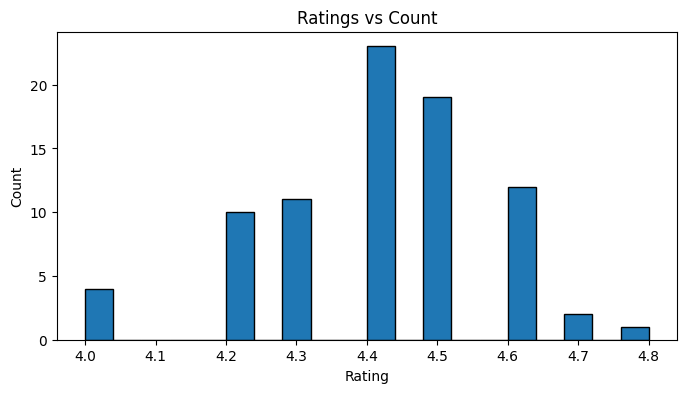

In [18]:
ratings = df['rating']
plt.figure(figsize=(8, 4))
plt.hist(ratings, bins=20, edgecolor='k')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Ratings vs Count')
plt.show()

# **Discounts Plot**

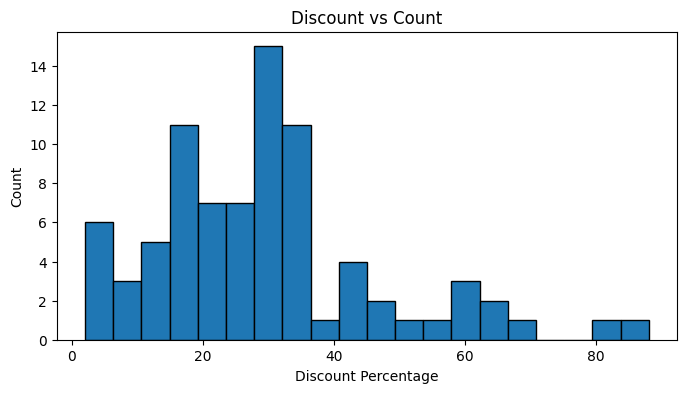

In [19]:
discounts = df['discount_perc']
plt.figure(figsize=(8, 4))
plt.hist(discounts, bins=20, edgecolor='k')
plt.xlabel('Discount Percentage')
plt.ylabel('Count')
plt.title('Discount vs Count')
plt.show()

# **Distribution of selling price feature**

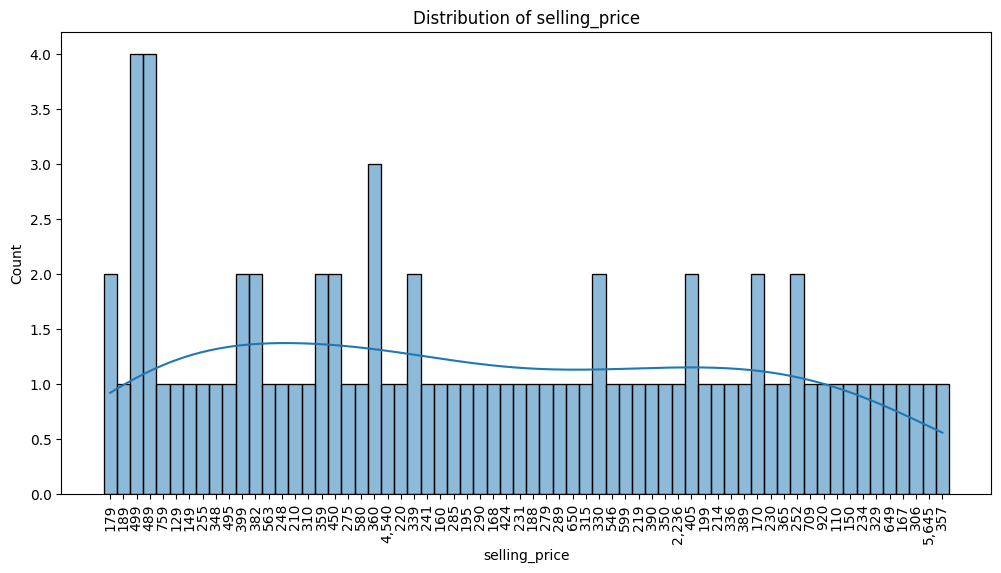

In [20]:
numeric_cols = ['selling_price']

for col in numeric_cols:
    plt.figure(figsize=(12, 6))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=90)
    plt.show()

# **Distribution of other numerical columns**

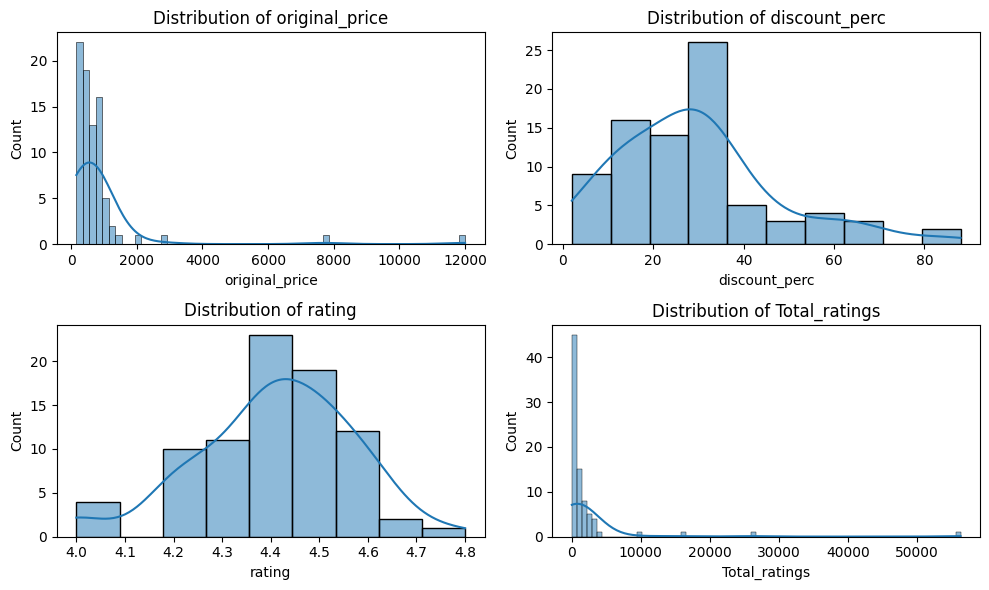

In [21]:
numeric_cols = ['original_price', 'discount_perc', 'rating', 'Total_ratings']
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 6))

axes = axes.ravel()
for i, col in enumerate(numeric_cols):
    sns.histplot(df[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

# **Correlation matrix**

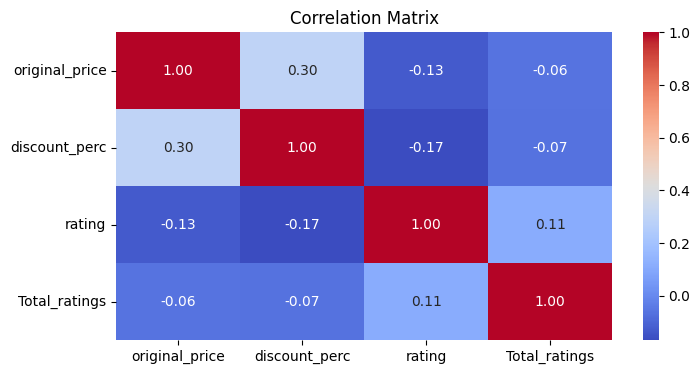

In [22]:
correlation_matrix = df[numeric_cols].corr()
plt.figure(figsize=(8, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# **Relationship between 'discount_perc' and 'original_price'**

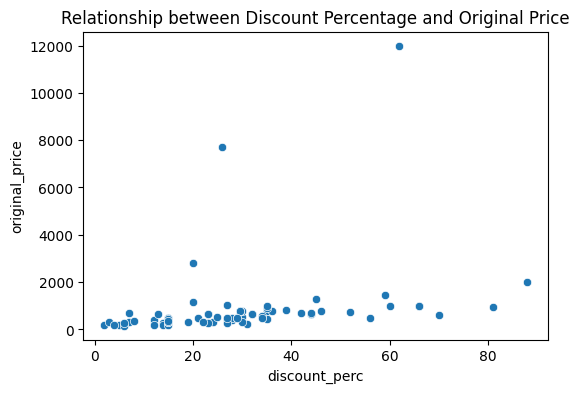

In [23]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x='discount_perc', y='original_price', data=df)
plt.title('Relationship between Discount Percentage and Original Price')
plt.show()

# **Relationship between 'rating' and 'Total_ratings'**

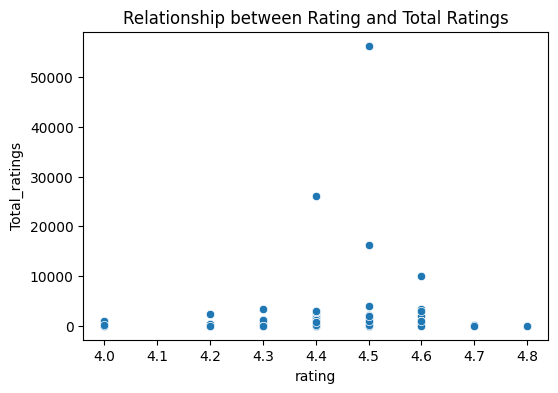

In [24]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x='rating', y='Total_ratings', data=df)
plt.title('Relationship between Rating and Total Ratings')
plt.show()

# **Pairplot for numerical features**

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


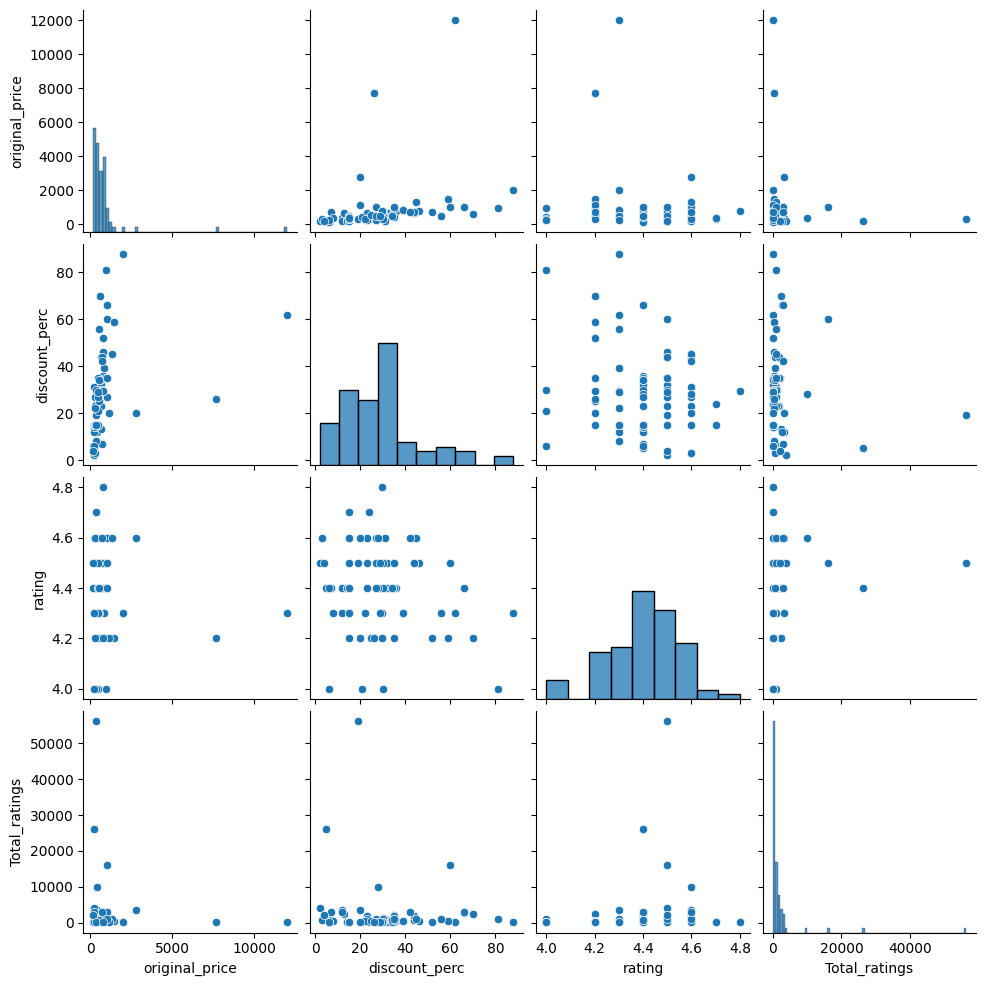

In [25]:
sns.pairplot(df[numeric_cols])
plt.show()